In [1]:
##########A few I/O tests with compressed and uncompressed datasets#################
import numpy as np
import os 
import sys
import h5py
import timeit
sys.path.append(os.path.realpath("/nfshome/dawit/compression_test/Triforce_CaloML/Loader"))
import loader
import glob

def file_size(file_path):
    size = os.stat(file_path).st_size
    return size/1000000.0

def timer(test_code, setup, iter_num):
    total_access_time = timeit.Timer(stmt=test_code, 
                                  setup=setup).timeit(number=iter_num)
    return (total_access_time/iter_num)

def access(file, keys):
    for key in file.keys():
        points = np.array(file[key]) # access entries and create a numpy array but this is biased by numpy
#         print(file[key])
        keys.append(file[key].name.replace('/','')) #store keys for later use. 
    return keys

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iter_num = 1
dataset_path = "/data/shared/LCDLargeWindow/"
comp_path = os.path.join(dataset_path,
                        'fixedangle/ChPiEscan/test1_comp_original.h5')

comp_file = h5py.File(comp_path, 'r')
comp_file_keys = []

setup = "from __main__ import access, comp_file, comp_file_keys"
test_code = "access(comp_file, comp_file_keys)"

size = []
time = []

comp_file.close()

tmp_path = "/data/shared/LCDLargeWindow/fixedangle/EleEscan/test1_comp_x.h5"

#check size and time for different compression levels and store result as tupels in size and time 
for comp_level in range(0,10):
    # repack data with giving comp_level
    cmd = "h5repack -v -f GZIP=%d /data/shared/LCDLargeWindow/fixedangle/EleEscan/test1_nocomp.h5 /data/shared/LCDLargeWindow/fixedangle/EleEscan/test1_comp_x.h5"%comp_level
    os.system(cmd) 
    comp_file = h5py.File(tmp_path, 'r') # open new file stored at tmp_path
    comp_file_keys = []
    sz = (comp_level, file_size(tmp_path))
    tm = (comp_level, timer(test_code, setup, iter_num))
    print("Current comp_level: %d ,Current size: %f ,Current access time: %f" %(comp_level, sz[1], tm[1]))
    size.append(sz)
    time.append(tm)
    comp_file.close() # close curent test.x h5 file 
    os.system("rm /data/shared/LCDLargeWindow/fixedangle/EleEscan/test1_comp_x.h5")  # delete test.x h5 file. 
    
print(size)
print(time)

# compression rate is not the problem. chunk_cache_size probably is. 


Current comp_level: 0 ,Current size: 6369.249688 ,Current access time: 21.219923
Current comp_level: 1 ,Current size: 213.607716 ,Current access time: 24.199667
Current comp_level: 2 ,Current size: 211.703661 ,Current access time: 24.212114
Current comp_level: 3 ,Current size: 209.370117 ,Current access time: 23.942506
Current comp_level: 4 ,Current size: 183.192873 ,Current access time: 32.248674
Current comp_level: 5 ,Current size: 182.631517 ,Current access time: 31.725729
Current comp_level: 6 ,Current size: 181.715798 ,Current access time: 31.076163
Current comp_level: 7 ,Current size: 181.447387 ,Current access time: 31.797432
Current comp_level: 8 ,Current size: 180.255338 ,Current access time: 31.967314
Current comp_level: 9 ,Current size: 180.100055 ,Current access time: 32.045436
[(0, 6369.249688), (1, 213.607716), (2, 211.703661), (3, 209.370117), (4, 183.192873), (5, 182.631517), (6, 181.715798), (7, 181.447387), (8, 180.255338), (9, 180.100055)]
[(0, 21.219923354219645), (

In [3]:
# test run for compression level-0 and uncompressed files 
# remove wrong entry 
# for point in size:
#     if point[0] == 0:
#         size.pop(point)
#         break
# for point in time:
# os.system("pwd")
# os.system("ls -lrth")
# os.system("h5dump -H -p /data/shared/LCDLargeWindow/fixedangle/EleEscan/test1_comp_original.h5")

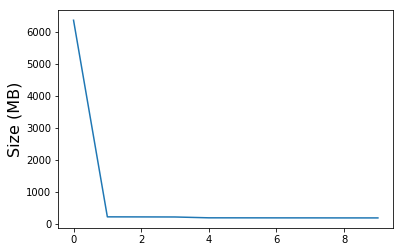

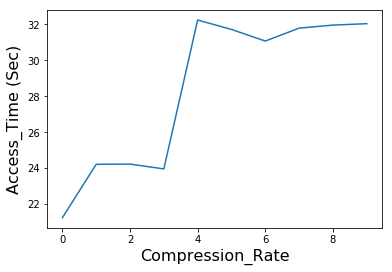

In [9]:
import matplotlib.pyplot as plt
comp_rate = [x[0] for x in size]
sizes = [x[1] for x in size]
times = [x[1] for x in time]

fig1 = plt.figure()
plt.plot(comp_rate,sizes, label="Size (MB)")
plt.ylabel('Size (MB)', size = 16)
fig2 = plt.figure()
plt.plot(comp_rate,times, label="Access_Time (sec)")
plt.xlabel('Compression_Rate', size=16)
plt.ylabel('Access_Time (Sec)', size=16)
plt.show()